In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from matplotlib.ticker import AutoMinorLocator
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import find_peaks
# from nolds import lyap_r
from scipy.integrate import solve_ivp
from functools import partial


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family'] = 'serif'
plt.rcParams.update({'figure.autolayout': True})


# Figs. (d-f): Exact dynamics of master equation (Eq. (1) with varying system sizes

In [ ]:
# Parameter values for Fig. 1(d)
Ω=1.45
U=0
κ=1
n_th=0
    

# Different system sizes
N_list=[51,76,101]

#Loop to time evolve the system for differet system sizes 

for N in N_list:
    # create creation, annhilation, x and p operators
    a=destroy(N)
    ad=create(N)
    I=qeye(N)
    x=(a+ad)/np.sqrt(2)
    p=(a-ad)/(np.sqrt(2)*1j)
    
    #create opaertors for subsystems A and B

    A=tensor(a,I)
    Ad=tensor(ad,I)
    B=tensor(I,a)
    Bd=tensor(I,ad)
    nA=Ad*A
    nB=Bd*B
    xA=(A+Ad)/np.sqrt(2)
    xB=(B+Bd)/np.sqrt(2)
    pA=(A-Ad)/(np.sqrt(2)*1j)
    pB=(B-Bd)/(np.sqrt(2)*1j)
    
    #Define the Hamiltonian and jump operators
    H=Ω*(Ad*B+A*Bd)/2+(U/N)*(nA*(nA-1)+nB*(nB-1))
    c_ops=[np.sqrt((1+n_th)*κ/N)*A*Bd,np.sqrt(n_th*κ/N)*Ad*B]
    
    # Define initial state
    α=1j*np.sqrt(N-1)/np.sqrt(2)
    r_int=coherent(N,α, method='operator')
    psi0=tensor(r_int,r_int)
    
    # Time series
    times=np.linspace(0,100,1000)
    
    # Using MCsolve to simulate large system size with averaging over 1000 trajectories
    sol=mcsolve(H,psi0,times,c_ops,[xA,pA,xB,pB],ntraj=1000)
    
    #saving the data
    np.savetxt("sol_U"+str(int(100*U))+"_O"+str(100*Ω)+"_n_"+str(N)+".out",sol.expect, delimiter=' ')

In [ ]:
# Parameter values for Fig. 1(e)
Ω=0.8
U=0.25
κ=1
n_th=0
    

# Different system sizes
N_list=[51,76,101]

#Loop to time evolve the system for differet system sizes 

for N in N_list:
    # create creation, annhilation, x and p operators
    a=destroy(N)
    ad=create(N)
    I=qeye(N)
    x=(a+ad)/np.sqrt(2)
    p=(a-ad)/(np.sqrt(2)*1j)
    
    #create opaertors for subsystems A and B

    A=tensor(a,I)
    Ad=tensor(ad,I)
    B=tensor(I,a)
    Bd=tensor(I,ad)
    nA=Ad*A
    nB=Bd*B
    xA=(A+Ad)/np.sqrt(2)
    xB=(B+Bd)/np.sqrt(2)
    pA=(A-Ad)/(np.sqrt(2)*1j)
    pB=(B-Bd)/(np.sqrt(2)*1j)
    
    #Define the Hamiltonian and jump operators
    H=Ω*(Ad*B+A*Bd)/2+(U/N)*(nA*(nA-1)+nB*(nB-1))
    c_ops=[np.sqrt((1+n_th)*κ/N)*A*Bd,np.sqrt(n_th*κ/N)*Ad*B]
    
    # Define initial state
    α=1j*np.sqrt(N-1)/np.sqrt(2)
    r_int=coherent(N,α, method='operator')
    psi0=tensor(r_int,r_int)
    
    # Time series
    times=np.linspace(0,100,1000)
    
    # Using MCsolve to simulate large system size with averaging over 1000 trajectories
    sol=mcsolve(H,psi0,times,c_ops,[xA,pA,xB,pB],ntraj=1000)
    
    #saving the data
    np.savetxt("sol_U"+str(int(100*U))+"_O"+str(100*Ω)+"_n_"+str(N)+".out",sol.expect, delimiter=' ')

In [ ]:
# Parameter values for Fig. 1(e)
Ω=1.45
U=0.25
κ=1
n_th=0
    

# Different system sizes
N_list=[51,76,101]

#Loop to time evolve the system for differet system sizes 

for N in N_list:
    # create creation, annhilation, x and p operators
    a=destroy(N)
    ad=create(N)
    I=qeye(N)
    x=(a+ad)/np.sqrt(2)
    p=(a-ad)/(np.sqrt(2)*1j)
    
    #create opaertors for subsystems A and B

    A=tensor(a,I)
    Ad=tensor(ad,I)
    B=tensor(I,a)
    Bd=tensor(I,ad)
    nA=Ad*A
    nB=Bd*B
    xA=(A+Ad)/np.sqrt(2)
    xB=(B+Bd)/np.sqrt(2)
    pA=(A-Ad)/(np.sqrt(2)*1j)
    pB=(B-Bd)/(np.sqrt(2)*1j)
    
    #Define the Hamiltonian and jump operators
    H=Ω*(Ad*B+A*Bd)/2+(U/N)*(nA*(nA-1)+nB*(nB-1))
    c_ops=[np.sqrt((1+n_th)*κ/N)*A*Bd,np.sqrt(n_th*κ/N)*Ad*B]
    
    # Define initial state
    α=1j*np.sqrt(N-1)/np.sqrt(2)
    r_int=coherent(N,α, method='operator')
    psi0=tensor(r_int,r_int)
    
    # Time series
    times=np.linspace(0,100,1000)
    
    # Using MCsolve to simulate large system size with averaging over 1000 trajectories
    sol=mcsolve(H,psi0,times,c_ops,[xA,pA,xB,pB],ntraj=1000)
    
    #saving the data
    np.savetxt("sol_U"+str(int(100*U))+"_O"+str(100*Ω)+"_n_"+str(N)+".out",sol.expect, delimiter=' ')

In [23]:
int(100*0)

0

In [17]:


def vectorfield_BHm(m, t, p):
    """
    Defines the system of differential equations based on Model B.
   
    Arguments:
        w : vector of the state variables
            w = [mxA, myA, mzA, mxB, myB, mzB]
        t : time
        p : vector of parameters
            p = [OmegaA, OmegaB, Gamma]
    """
   
    xA, pA, xB, pB = m
    Omega,kappa,U, mu = p
   
    f = [ Omega*pB/2-kappa*xA*(xB**2+pB**2)/4+U*pA*(xA**2+pA**2)-mu*pA,
         -Omega*xB/2-kappa*pA*(xB**2+pB**2)/4-U*xA*(xA**2+pA**2)+mu*xA,
         Omega*pA/2+kappa*xB*(xA**2+pA**2)/4+U*pB*(xB**2+pB**2)-mu*pB,
         -Omega*xA/2+kappa*pB*(xA**2+pA**2)/4-U*xB*(xB**2+pB**2)+mu*xB]
   
    return f

def fourier_transform(data, dt):
    n = len(data)
    fft_result = np.fft.fft(data)
    fft_freq = 2*np.pi*np.fft.fftfreq(n, dt)
    return fft_freq, fft_result

Omega1 = 0.8
Omega2 = 1.45

Ω = [Omega1,Omega2]
mu=0
U1= 0
U2= 0.25
U = [U1, U2]
κ=1
xx=0
m0 = [np.sqrt(xx), np.sqrt(1-xx), np.sqrt(xx), np.sqrt(1-xx)]

f_s = 10                              # number of time steps
end = 1000                             # final time
time = np.linspace(0.0, end, end*f_s+1)

p00 = [Ω[0],κ,U[0],mu]
p01 = [Ω[1],κ,U[0],mu]
p10 = [0.5,κ,U[1],mu]
p11 = [Ω[1],κ,U[1],mu]

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

msol1n = odeint(vectorfield_BHm, m0, time, args=(p01,), atol=abserr, rtol=relerr)
msol2n = odeint(vectorfield_BHm, m0, time, args=(p10,), atol=abserr, rtol=relerr)
msol3n = odeint(vectorfield_BHm, m0, time, args=(p11,), atol=abserr, rtol=relerr)

In [18]:
solt_U_n50=np.loadtxt('sol_U25_O145_n_51.out',delimiter=' ')
solt_U_n75=np.loadtxt('sol_U25_O145_n_76.out',delimiter=' ')
solt_U_n100=np.loadtxt('sol_U25_O145_n_101.out',delimiter=' ')
solm_U_n50=np.loadtxt('sol_U25_O80_n_51.out',delimiter=' ')
solm_U_n75=np.loadtxt('sol_U25_O80_n_76.out',delimiter=' ')
solm_U_n100=np.loadtxt('sol_U25_O80_n_101.out',delimiter=' ')
solt_n50=np.loadtxt('sol_U0_O145_n_51.out',delimiter=' ')
solt_n75=np.loadtxt('sol_U0_O145_n_76.out',delimiter=' ')
solt_n100=np.loadtxt('sol_U0_O145_n_101.out',delimiter=' ')

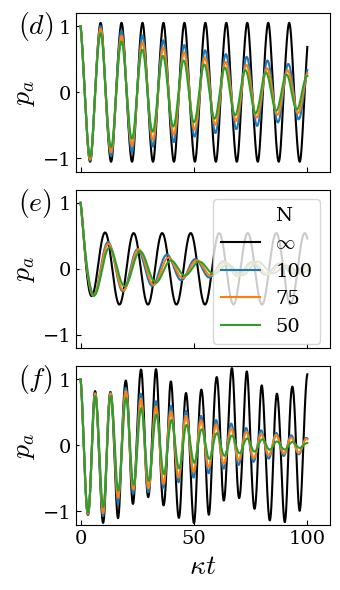

In [21]:
tin=0
tf=1000
y_lim=1.2
x_f=110
x_in=-2
cap_size=20
leg_size=14
time=np.linspace(0,100,tf)
fig, ax = plt.subplots(3, 1, figsize=(3.5,6))
plt.subplots_adjust(hspace=0,wspace=0.01)

k=0

ax[k].plot(time,msol1n[tin:tf,0],'w',label=rf'N')

ax[k].plot(time,msol1n[tin:tf,1],'k',label=rf'$\infty$')
ax[k].plot(time,solt_n100[1]/np.sqrt(100),label=rf'100')
ax[k].plot(time,solt_n75[1]/np.sqrt(75),label=rf'75')
ax[k].plot(time,solt_n50[1]/np.sqrt(50),label=rf'50')
ax[k].xaxis.set_ticklabels([])
ax[k].set_ylabel(r'$p_{a}$', fontsize=cap_size)
ax[k].tick_params(which='both', direction='in', labelsize=lab_size)
# ax[k].legend(loc='upper right', fontsize=leg_size)
ax[k].set_ylim(-y_lim,y_lim)
ax[k].set_xlim(x_in,x_f)
k=1
ax[k].plot(time,msol1n[tin:tf,0],'w',label=rf'N')

ax[k].plot(time,msol2n[tin:tf,1],'k',label=rf'$\infty$')
ax[k].plot(time,solm_U_n100[1]/np.sqrt(100),label=rf'100')
ax[k].plot(time,solm_U_n75[1]/np.sqrt(75),label=rf'75')
ax[k].plot(time,solm_U_n50[1]/np.sqrt(50),label=rf'50')
ax[k].xaxis.set_ticklabels([])
ax[k].set_ylabel(r'$p_{a}$', fontsize=cap_size)

# ax[1,k].set_ylabel(r'$\mathcal{F}(p_{\alpha})$', fontsize=18)
ax[k].tick_params(which='both', direction='in', labelsize=lab_size)
ax[k].legend(loc='upper right', fontsize=leg_size)
ax[k].set_ylim(-y_lim,y_lim)
ax[k].set_xlim(x_in,x_f)
k=2
ax[k].plot(time,msol1n[tin:tf,0],'w',label=rf'N')

ax[k].plot(time,msol3n[tin:tf,1],'k',label=rf'$\infty$')
ax[k].plot(time,solt_U_n100[1]/np.sqrt(100),label=rf'100')
ax[k].plot(time,solt_U_n75[1]/np.sqrt(75),label=rf'75')
ax[k].plot(time,solt_U_n50[1]/np.sqrt(50),label=rf'50')
ax[k].set_xlabel(r'$\kappa t$', fontsize=cap_size)
ax[k].set_ylabel(r'$p_{a}$', fontsize=cap_size)

ax[k].tick_params(which='both', direction='in', labelsize=lab_size)
# ax[k].legend(loc='upper right', fontsize=leg_size)
ax[k].set_ylim(-y_lim,y_lim)
ax[k].set_xlim(x_in,x_f)
plt.tight_layout()


xx=-20
yy=1

ax[0].text(
    xx, yy,  # Position (x, y) in figure coordinates
    r'$(d)$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=20  # Font size
#     color='white'
)
ax[1].text(
    xx, yy,  # Position (x, y) in figure coordinates
    r'$(e)$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=20  # Font size
#     color='white'
)
ax[2].text(
    xx, yy,  # Position (x, y) in figure coordinates
    r'$(f)$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=20  # Font size
#     color='white'
)
# plt.savefig('TC123_ME.svg',dpi=300)

plt.show()